In [1]:
from matplotlib import pyplot as plt
import numpy as np
from os import walk
from PIL import Image
import tifffile

10.40920344696717

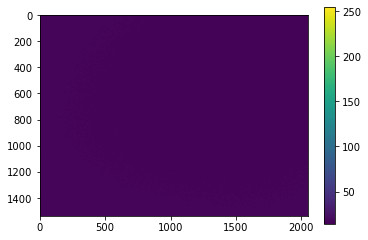

In [28]:
folder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\CS optics\Noise data\2021-05-04 Noise tests\\'
#file = r'EMCCD-0-01_  01.tif'
file = r'EMCCD-10-0_  01.tif'
# fpath = folder + file
# fpath = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\PIXIS test  3.tif'

#topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\QI Click\\'
topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 5\\'
#subfolders = [r'10 ms\\', r'100 ms\\', r'1 s\\', r'10 s\\']
subfolders = [r'5s 0 db\\', '10 db 500 ms\\']
folder = topfolder+subfolders[0]
_, _, filenames = next(walk(folder))
fpath = folder + filenames[5]

#im = plt.imread(fpath)
im = np.array(Image.open(fpath).convert('L'))
#im = tifffile.imread(fpath)[:,:,0]

plt.imshow(im)
plt.colorbar()

calculate_bit_depth(fpath,thresh=0.1,bit=12)

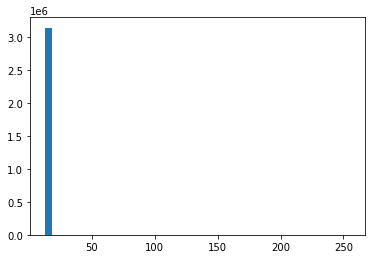

In [13]:
# plot histogram of image
s = np.shape(im)
imflat = np.reshape(im,(s[0]*s[1]))
plt.hist(imflat,bins=50)
plt.show()

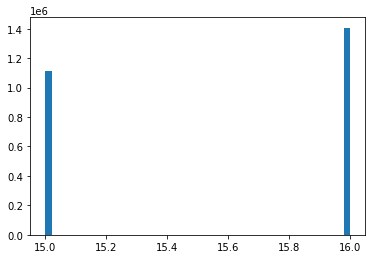

15

In [14]:
# plot thresholded histogram
t = 0.1
im_ord = np.sort(imflat)
i_10pc = int(s[0]*s[1]*t)
im_thresh = im_ord[i_10pc:-i_10pc]
plt.hist(im_thresh,bins=50)
plt.show()
#calculate_bit_depth(imflat,thresh=0.1)
np.min(im_thresh)

In [15]:
# calculate effective bit depth
bit = 12
imflat=im_thresh
mean = np.mean(imflat)
rnge = np.max(imflat) - np.min(imflat)
ebd = np.log2((2**bit-mean)/rnge)
ebd

11.99450934283264

In [16]:
def calculate_bit_depth(fpath,thresh=True,bit=16):
    try:
        im = plt.imread(fpath)
        s = np.shape(im)
        imflat = np.reshape(im,(s[0]*s[1]))
    except: # for RGB images
        im = np.array(Image.open(fpath).convert('L'))
        s = np.shape(im)
        imflat = np.reshape(im,(s[0]*s[1]))
    if thresh != 0:
        im_ord = np.sort(imflat)
        i_10pc = int(s[0]*s[1]*thresh)
        im_thresh = im_ord[i_10pc:-i_10pc]
        imflat = im_thresh
    mean = np.mean(imflat)
    rnge = np.max(imflat) - np.min(imflat)
    ebd = np.log2((2**bit-mean)/rnge)
    return ebd

In [100]:
folder = topfolder+subfolders[1]
_, _, filenames = next(walk(folder))
fpath = folder+filenames[0]
im = Image.open(fpath).convert('L')
#im = plt.imread(fpath)

#plt.imshow(im)
#plt.colorbar()
#np.shape(im)
#np.max(im)
np.max(im)

212

In [30]:
thresh = 0.1

In [36]:
# extract EMCCD and PIXIS data from 04/05/2021
folder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\CS optics\Noise data\2021-05-04 Noise tests\\'
file = r'EMCCD-0-01_  01.tif'
ebds = np.zeros((6,4,10)) # first col is series
for i, c in enumerate(['EMCCD','PIXIS','PIXIS2']):
    if c == 'PIXIS2':
        folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Pixis\\'
    for j, e in enumerate(['0-01','0-1','1-0','10-0']):
        for k, n in enumerate(['01','02','03','04','05','06','07','08','09','10']):
            file = r'%s-%s_  %s.tif' % (c,e,n)
            fpath = folder + file

            ebd = calculate_bit_depth(fpath,thresh=thresh)
            ebds[i,j,k] = ebd

In [37]:
# extract b/w data from 12/05/2021
# b/w camera
#topfolder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\CS optics\Noise data\2021-05-12 Noise tests\\'
topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\QI Click\\'
subfolders = [r'10 ms\\', r'100 ms\\', r'1 s\\', r'10 s\\']
for j,subfolder in enumerate(subfolders):
    folder = topfolder+subfolder
    _, _, filenames = next(walk(folder))
    for k,filename in enumerate(filenames):
        fpath = folder + filename
        ebd = calculate_bit_depth(fpath,thresh=thresh,bit=12)
        ebds[3,j,k] = ebd

<ipython-input-16-3f609323d775>:17: RuntimeWarning: divide by zero encountered in double_scalars
  ebd = np.log2((2**bit-mean)/rnge)


In [38]:
# extract chameleon data from 12/05/2021
#topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 1\\'
topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 2\\' # without gain
#topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 4\\' # with gain
#subfolders = [r'C3 0-01\\', r'C3 0-1s\\', r'C3 1s\\', r'C3 10s\\']
subfolders = [r'10 ms\\', r'100 ms\\', r'1 s\\', r'10 s\\']
for j,subfolder in enumerate(subfolders):
    folder = topfolder+subfolder
    _, _, filenames = next(walk(folder))
    for k,filename in enumerate(filenames):
        fpath = folder + filename
        ebd = calculate_bit_depth(fpath,thresh=thresh,bit=12)
        ebds[4,j,k] = ebd

<ipython-input-16-3f609323d775>:17: RuntimeWarning: divide by zero encountered in double_scalars
  ebd = np.log2((2**bit-mean)/rnge)


In [39]:
# extract chameleon data from 12/05/2021
#topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 1\\'
#topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 2\\' # without gain
topfolder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\Chameleon 4\\' # with gain
#subfolders = [r'C3 0-01\\', r'C3 0-1s\\', r'C3 1s\\', r'C3 10s\\']
subfolders = [r'10 ms\\', r'100 ms\\', r'1 s\\', r'10 s\\']
for j,subfolder in enumerate(subfolders):
    folder = topfolder+subfolder
    _, _, filenames = next(walk(folder))
    for k,filename in enumerate(filenames):
        fpath = folder + filename
        ebd = calculate_bit_depth(fpath,thresh=thresh,bit=12)
        ebds[5,j,k] = ebd

Text(0.5, 1.0, 'Threshold top 10% and bottom 10%')

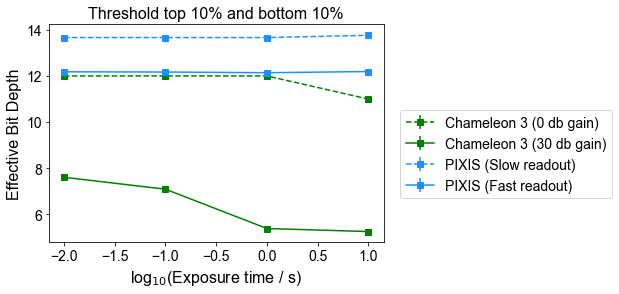

In [46]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})
xs = [0.01,0.1,1,10]

ys = []
errs = []
for i in range(4):
    data = ebds[4,i,:]
    data = data[np.isinf(data)==False]
    y = np.mean(data)
    err = np.std(data)/len(data)**.5
    ys.append(y)
    errs.append(err)
    
ys[0]=12
ys[1] = 12
ys[2] = 12


plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s--',label='Chameleon 3 (0 db gain)',color='g')

ys = []
errs = []
for i in range(4):
    data = ebds[5,i,:]
    data = data[np.isinf(data)==False]
    y = np.mean(data)
    err = np.std(data)/len(data)**.5
    ys.append(y)
    errs.append(err)


plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s-',label='Chameleon 3 (30 db gain)',color='g')
# plt.plot([np.log10(10*1e-3)],[12],'gv')
# plt.plot([np.log10(100*1e-3)],[12],'gv')
# plt.plot([np.log10(1000*1e-3)],[12],'gv')

#plt.plot([np.log10(4),np.log10(10*1e-3)],[5,7], 'g*',label='Chameleon 3 (AG)')


ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[0,i,:])
    err = np.std(ebds[0,i,:])/10**.5
    ys.append(y)
    errs.append(err)

#plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='o-',label='ProEM ',color='salmon')
ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[2,i,:])
    err = np.std(ebds[2,i,:])/10**.5
    ys.append(y)
    errs.append(err)

plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s--',label='PIXIS (Slow readout)',color='dodgerblue')


ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[1,i,:])
    err = np.std(ebds[1,i,:])/10**.5
    ys.append(y)
    errs.append(err)

plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s-',label='PIXIS (Fast readout)',color='dodgerblue')



ys = []
errs = []
for i in range(4):
    # remove where value is inf
    data = ebds[3,i,:]
    data = data[np.isinf(data)==False]
    y = np.mean(data)
    err = np.std(data)/len(data)**.5
    ys.append(y)
    errs.append(err)
    
# ys[0]=12
# ys[1] = 12

#plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s-',label='QI Click',color='k')
# plt.plot([np.log10(10*1e-3)],[12],'k^')
# plt.plot([np.log10(100*1e-3)],[12],'k^')



#plt.title('10% upper and lower threshold',fontsize = 16)
plt.ylabel('Effective Bit Depth',fontsize=16)
plt.xlabel('log$_{10}$(Exposure time / s)',fontsize=16)
#plt.ylim([9.8,14])
plt.legend(loc=(1.05,0.2))
#plt.title('No threshold',fontsize=16)
#plt.title('Threshold top 1% and bottom 1%',fontsize=16)
plt.title('Threshold top 10% and bottom 10%',fontsize=16)

In [46]:
for i in range(4):
    y = np.nanmean(ebds[4,i,:])
    err = np.std(ebds[3,i,:])/10**.5
    print(y,err)

inf 0.004818625906242839
inf 0.0044875026510316305
inf nan
10.994360091820331 nan


In [47]:
ebds

array([[[10.10399096, 10.10399154, 10.10404732, 10.10396937,
         10.10404876, 10.10404998, 10.10397118, 10.10403407,
         10.1039795 , 10.10405865],
        [10.10403772, 10.10389409, 10.10385339, 10.10389658,
         10.10385615, 10.10389623, 10.12857298, 10.10385835,
         10.10383867, 10.12856745],
        [10.07963532, 10.10389405, 10.10382719, 10.10386978,
         10.10385908, 10.07963923, 10.10393716, 10.10379529,
         10.07957246, 10.07955189],
        [10.05558122, 10.05551868, 10.07937681, 10.0793515 ,
         10.07941276, 10.05558458, 10.07944948, 10.0794831 ,
         10.0794175 , 10.05558679]],

       [[12.17879984, 12.17880622, 12.17880526, 12.17880227,
         12.17880501, 12.17880376, 12.17880655, 12.17880556,
         12.17880249, 12.17881172],
        [12.17879282, 12.17879572, 12.17879057, 12.17879329,
         12.17879685, 12.17879752, 12.17879591, 12.17879762,
         12.17879401, 12.07925159],
        [12.0792065 , 12.17872798, 12.17873145, 12